In [1]:
import pandas as pd

from libs.data_lib.eda import create_symbol_dataframes
from libs.io_lib.paths import DATA_DIR

from libs.plot_lib.data import plot_feature_evolution
from libs.data_lib.display import display_symbol_timeline, get_symbol_statistics


In [2]:

# df = pd.read_parquet('C:/Users/srabh/OneDrive/Documents/Jane_Street_Data_Challenge/train.parquet/partition_id=9/part-0.parquet')
df = pd.read_parquet(DATA_DIR / 'part-0_id_9.parquet')


C:\Users\rghig\Dropbox\Kaggle\JaneS\JS2024


1. Groupement des données par symbol...
Nombre total de symbols: 39


100%|██████████| 39/39 [00:06<00:00,  6.02it/s]



2. Aperçu des données chronologiques:

Symbol ID: 0
--------------------------------------------------
       date_id  symbol_id    weight  feature_00  feature_01  feature_02  \
0         1530          0  3.084694    1.153571    1.563784    0.697396   
17871     1530          0  3.084694    0.684324   -1.104674    0.785371   
37        1530          0  3.084694    1.526388    1.685531    0.605749   
74        1530          0  3.084694    1.340964    1.983167    0.265608   
111       1530          0  3.084694    1.524939    1.978163    0.512771   

       feature_03  feature_04  feature_05  feature_06  ...  feature_69  \
0        0.756759    2.580965    0.171311    1.126353  ...    0.493488   
17871    0.785760   -1.000620   -0.351899    0.175980  ...   -0.434310   
37       1.037362    2.191367    0.256185    0.915194  ...    0.557781   
74       0.499131    2.603905    0.556939    3.110481  ...    0.355192   
111      0.693869    2.607875    0.650951    2.096772  ...    0.360436   



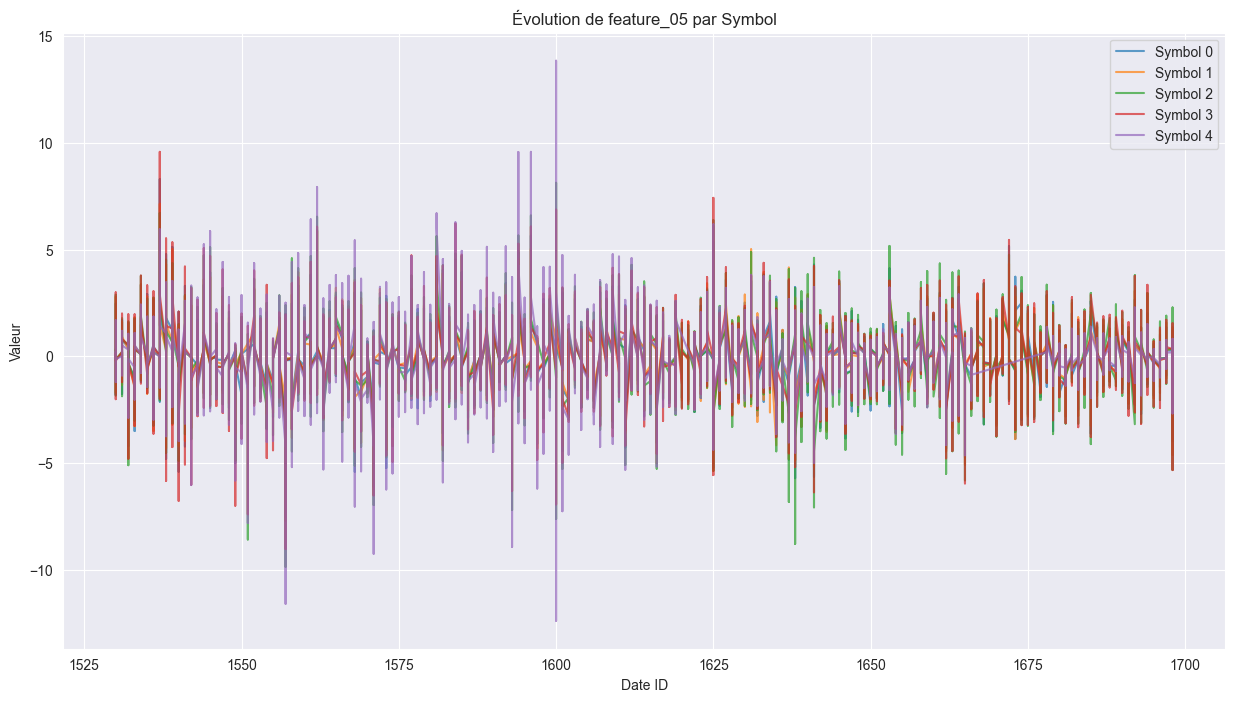

In [3]:

# Exécuter l'analyse complète

print("1. Groupement des données par symbol...")
symbol_data = create_symbol_dataframes(df)

print("\n2. Aperçu des données chronologiques:")
n_display_symbols = 5
display_symbol_timeline(symbol_data, n_symbols=n_display_symbols)

print("\n3. Statistiques par symbol:")
stats_df = get_symbol_statistics(symbol_data)
print(stats_df.head())

print("\n4. Visualisation de l'évolution d'une feature:")
feature_to_plot = 'feature_05'
plot_feature_evolution(symbol_data, feature_name=feature_to_plot, 
                     n_symbols=n_display_symbols)


# symbol_data, stats = run_complete_analysis(df)

'''
# Pour voir les données d'un symbol spécifique
symbol_id = 1
print(f"\nDonnées pour Symbol {symbol_id}:")
print(symbol_data[symbol_id].sort_values('date_id').head())

# Pour voir l'évolution d'une feature spécifique
plot_feature_evolution(symbol_data, feature_name='feature_05', n_symbols=3)

# Pour voir les statistiques
print("\nStatistiques par symbol:")
print(stats.sort_values('n_dates', ascending=False).head())
'''

In [5]:
df_symbols = pd.concat(symbol_data.values(), ignore_index=True).sort_values(['symbol_id', 'date_id']).reset_index(drop=True)

In [ ]:
# create_symbol_datasets(df_symbols, base_path="C:/Users/srabh/Downloads/janestreetpartition9")